In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 數據集內容

In [4]:
len(x_train), len(x_test)

(60000, 10000)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

### 轉一下我們的資料格式:

### (28,28) --> (28, 28, 1)

In [8]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1) / 255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# dense全連結神經層
# Conv2D的2D代表每個「記分板(kernal)」的維度 

### Step1. 打造函數學習機(CNN)

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), padding = "same", 
                 input_shape =(28,28,1), 
                 activation = "relu" )) 

### 輸出16個 28x28 矩陣
### 事實上是(28,28,16)

In [24]:
model.add(MaxPooling2D(pool_size = (2,2)))# (14,14,16) 原本為28x28,16張記分板，每個都切成2x2, 剩下14x14

In [25]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu')) # output = (14,14,32)

In [26]:
model.add(MaxPooling2D(pool_size = (2,2)))# output (7,7,32)

In [27]:
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))

In [28]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(60,activation = "relu"))

In [31]:
model.add(Dense(10,activation = "softmax")) #10個數字, softmax 加起來為1

## 看一下神經網路

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [34]:
model.compile(loss = "mse", optimizer = SGD(lr = 0.090),
             metrics = ["accuracy"])

### Step2. fit

In [ ]:
model.fit(x_train, y_train, batch_size = 128, epochs = 12)#第一次訓練，訓練結果不小心刪掉了

In [36]:
model.fit(x_train, y_train, batch_size = 64, epochs = 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 390us/sample - loss: 0.0271 - accuracy: 0.8120
Epoch 2/15
60000/60000 [==============================] - 24s 397us/sample - loss: 0.0256 - accuracy: 0.8223
Epoch 3/15
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0244 - accuracy: 0.8319
Epoch 4/15
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0235 - accuracy: 0.8382
Epoch 5/15
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0227 - accuracy: 0.8434
Epoch 6/15
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0219 - accuracy: 0.8499
Epoch 7/15
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0213 - accuracy: 0.8538
Epoch 8/15
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0208 - accuracy: 0.8568
Epoch 9/15
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0203 - accuracy: 0.8

### Step3.預測

In [37]:
result = model.predict_classes(x_test)

In [38]:
def my_predict(n):
    print('我的CNN預測是:', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = "Greens" )

我的CNN預測是: Trouser


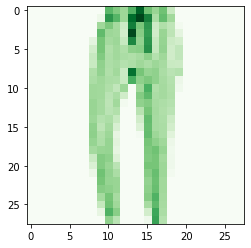

In [39]:
my_predict(80) 

In [40]:
from ipywidgets import interact_manual

In [41]:
interact_manual(my_predict, n = (0,9999)) 

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [72]:
score = model.evaluate(x_test, y_test) #第一次的結果

10000/10000 [==============================] - 2s 151us/sample - loss: 0.0276 - accuracy: 0.8064


In [42]:
score = model.evaluate(x_test, y_test) #第二次的結果

10000/10000 [==============================] - 2s 155us/sample - loss: 0.0204 - accuracy: 0.8606


In [43]:
loss,acc = score

In [44]:
print("測試資料的正確率:", acc)

測試資料的正確率: 0.8606


### 把model儲存起來

In [45]:
model.save("myCNNmodel.h5")

#### 第一次的訓練準確率為80%，想要再提升
* 再讓它訓練一次
* batch size使用128和64
* 訓練次數使用12和15
* 模型的準確率由80%上升至86%
